<a href="https://colab.research.google.com/github/Kagaline/Colab/blob/master/TOEIC_L%26R_TEST_%E5%BF%85%E3%81%9A%E2%98%86%E3%81%A7%E3%82%8B%E7%86%9F%E8%AA%9E%E3%82%B9%E3%83%94%E3%83%BC%E3%83%89%E3%83%9E%E3%82%B9%E3%82%BF%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOEIC L&R TEST 必ず☆でる熟語スピードマスター
original 音声:https://www.jresearch.co.jp/book/b427633.html

## 音声の加工

### 不要な音声（導入の日本語）をカットする

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment

audio = AudioSegment.from_file("/content/drive/MyDrive/TOEIC/idiom/001.mp3", format="mp3")
start_time = 7000  # 開始時間（ミリ秒）
end_time = -1  # 終了時間（ミリ秒）

extracted_audio = audio[start_time:]

extracted_audio.export("/content/drive/MyDrive/TOEIC/idiom/001-cutted.mp3", format="mp3")


<_io.BufferedRandom name='/content/drive/MyDrive/TOEIC/idiom/001-cutted.mp3'>

この後"/content/sample_data/idioms/001-cutted.mp3"をチェックして問題なければ"/content/sample_data/idioms/001.mp3"と置き換える。

### 音声データの波形を見てみる

In [ ]:
!pip install librosa numpy

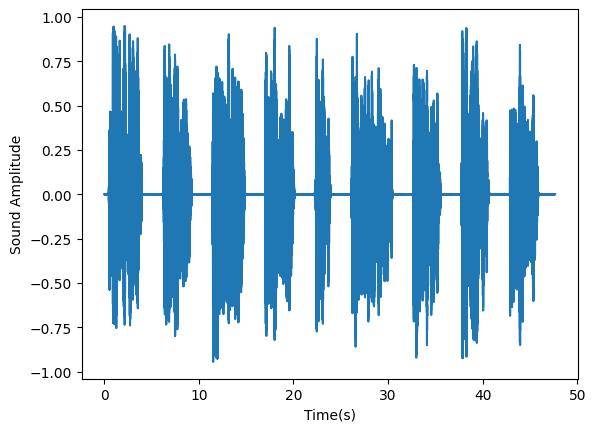

In [ ]:
# librosaをインポート
import librosa
# numpyをインポート（配列を生成するため）
import numpy as np
# matplotlibをインポート（グラフ描画するため）
import matplotlib.pyplot as plt

# 音楽ファイルのパスを設定（例："/foldername/filename.mp3"）
file_name = "/content/drive/MyDrive/TOEIC/idiom/032.mp3"
# loadメソッドでy=音声信号の値（audio time series）、sr=サンプリング周波数（sampling rate）を取得
# 参考：https://librosa.org/doc/latest/generated/librosa.load.html?highlight=load#librosa.load
y, sr = librosa.load(file_name)
# 時間 = yのデータ数 / サンプリング周波数
# 参考：https://note.nkmk.me/python-numpy-arange-linspace/
time = np.arange(0,len(y)) / sr

# xにtime、yにyとしてプロット
plt.plot(time, y)
# x軸とy軸にラベルを設定（x軸は時間、y軸は振幅）
# 参考：https://techacademy.jp/magazine/19316
plt.xlabel("Time(s)")
plt.ylabel("Sound Amplitude")

# グラフを表示
plt.show()

### "Day."を切り取る


In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

for current in range(1,140):
    if current in (1, 6, 11, 16, 21, 26, 31, 36, 44, 51, 56, 64, 72, 80, 88, 98, 106, 114, 122, 130):
        audio = AudioSegment.from_file("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+".mp3", format="mp3")
        start_time = 1500  # 開始時間（ミリ秒）

        extracted_audio = audio[start_time:]

        extracted_audio.export("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+"-cutted.mp3", format="mp3") 


うまくいかなかった音源は個別に対処した

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

for current in range(1,140):
    if current == 1:
        audio = AudioSegment.from_file("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+".mp3", format="mp3")
        start_time = 3000  # 開始時間（ミリ秒）

        extracted_audio = audio[start_time:]

        extracted_audio.export("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+"-cutted.mp3", format="mp3") 

    if current in (72, 80, 88, 130):
        audio = AudioSegment.from_file("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+".mp3", format="mp3")
        start_time = 1700  # 開始時間（ミリ秒）

        extracted_audio = audio[start_time:]

        extracted_audio.export("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+"-cutted.mp3", format="mp3") 
    if current in (98, 106, 114, 122):
        audio = AudioSegment.from_file("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+".mp3", format="mp3")
        start_time = 1870  # 開始時間（ミリ秒）

        extracted_audio = audio[start_time:]

        extracted_audio.export("/content/drive/MyDrive/TOEIC/idiom/"+str(current).zfill(3)+"-cutted.mp3", format="mp3") 

In [ ]:
!rm /content/drive/MyDrive/TOEIC/idiom/*-cutted.mp3

### 音声を空白で区切る（細切れにする）

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

numbering = 1
for current in range(1, 140):
    audio_path = "/content/drive/MyDrive/TOEIC/idiom/" + str(current).zfill(3) + ".mp3"
    sound = AudioSegment.from_file(audio_path, format="mp3")

    # 会話表現のところはすくしだけ無音の期間を長くとることで誤った分割を防ぐ
    chunks = split_on_silence(
        sound,

        # 2000ms以上の無音がある箇所で分割
        min_silence_len=2000,

        # -30dBFS以下で無音とみなす
        silence_thresh=-30, 

        # 分割後500msだけ、無音を残す
        keep_silence=500
    )

    # 分割数の表示
    print(len(chunks))
    for i, chunk in enumerate(chunks):
        chunk.export(u"/content/drive/MyDrive/TOEIC/idioms/"+str(numbering).zfill(4)+".mp3", format="mp3")     
        numbering += 1   
    

In [ ]:
!rm -f drive/MyDrive/TOEIC/idioms/*

## 音声のパスを作成しておく

In [ ]:
with open("/content/drive/MyDrive/TOEIC/sound_path.txt", "a") as f:
    for i in range(1, 1001):
        f.write("[sound:idioms\\"+str(i).zfill(4)+".mp3]\n")

## 英語音声から文字起こしをする

In [ ]:
!pip install git+https://github.com/openai/whisper.git

In [ ]:
import whisper

# モデルを作成
model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.87G/2.87G [00:48<00:00, 63.1MiB/s]


In [ ]:
import glob
from natsort import natsorted

# フォルダ内のすべての音声ファイルのパスを生成
allfilename = glob.glob("/content/drive/MyDrive/TOEIC/idioms/*")
ordered_file = natsorted(allfilename)
for file in ordered_file:
  print(file)
  result = model.transcribe(file)
  text = result["text"]
  print(text)
  with open("/content/drive/MyDrive/TOEIC/idioms_english.txt", "a") as txtfile:
    txtfile.write(text+"\n")
print("finish")

## 英語テキストを日本語に翻訳する

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator

with open('/content/drive/MyDrive/TOEIC/idioms_english.txt') as f:
    lines = f.readlines()
 
    translator = Translator()
    for line in lines:
        translated = translator.translate(line, src="en", dest="ja")
        print(line)  # 翻訳したい文章
        text = translated.text
        with open("/content/drive/MyDrive/TOEIC/idioms_japanese.txt", "a") as ja_f:
          ja_f.write(text+"\n")
        print(text)  # 翻訳後の文章
